# EDA & modelization

## Loading main packages 

In [2]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.features import pca_decomposition
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.target.feature_correlation import feature_correlation
from polylearn import PolynomialNetworkClassifier
from polylearn import FactorizationMachineClassifier
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping


## Exploratory Data Analysis 

### File and parameters loading

In [3]:
problem_type = 'classification'

In [4]:
stacking = 'False'

In [5]:
data_size = 'small'

In [6]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.5/dataset/mushrooms.csv')

In [7]:
target_col = 'class'

In [8]:
user_drop_cols = []

In [9]:
threshold_NaN = 0.5

In [10]:
threshold_cat = 5

In [11]:
threshold_Z = 3.0

### Dataset Information

In [12]:
df.shape

(8124, 23)

Some records

In [13]:
display(df)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Dataframe structure

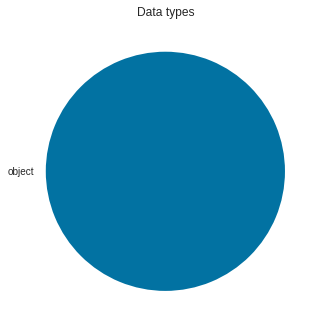

In [14]:
plot_dataframe_structure(df)

### Dataframe statistics

In [15]:
display(df.describe().T)

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Which columns could be categorical ?

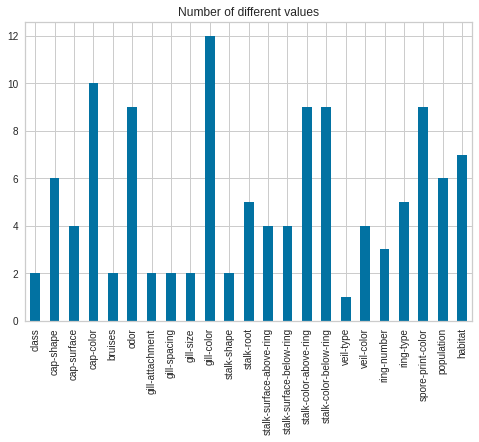

In [16]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [17]:
duplicates(df)

No duplicate rows.


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


#### Drop user's columns:

In [18]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [19]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [20]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [21]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [22]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [23]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding object column: class
Encoding object column: cap-shape
Encoding object column: cap-surface
Encoding object column: cap-color
Encoding object column: bruises
Encoding object column: odor
Encoding object column: gill-attachment
Encoding object column: gill-spacing
Encoding object column: gill-size
Encoding object column: gill-color
Encoding object column: stalk-shape
Encoding object column: stalk-root
Encoding object column: stalk-surface-above-ring
Encoding object column: stalk-surface-below-ring
Encoding object column: stalk-color-above-ring
Encoding object column: stalk-color-below-ring
Encoding object column: veil-type
Encoding object column: veil-color
Encoding object column: ring-number
Encoding object column: ring-type
Encoding object column: spore-print-color
Encoding object column: population
Encoding object column: habitat


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


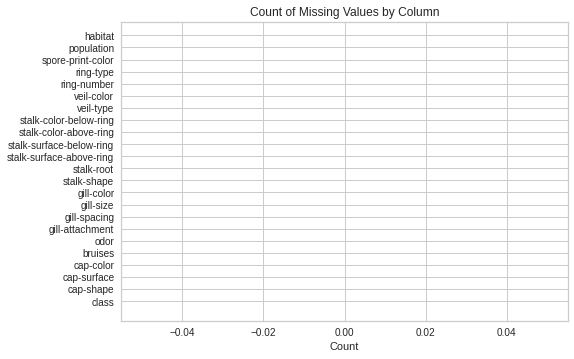

In [24]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [25]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [26]:
df = downcast_dtypes(df)

Memory usage of dataframe is 1.43MB
Memory usage after optimization is: 0.18MB
Decreased by 87.5%


Dataframe structure after compression

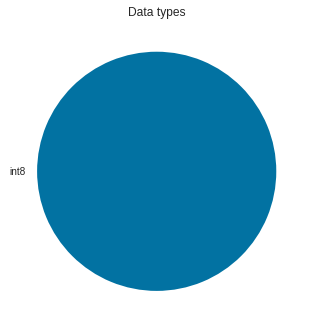

In [27]:
plot_dataframe_structure(df)

#### Outliers:

In [28]:
df = outliers(df, threshold_Z)

Possible problem with outliers treatment, check threshold_Z


#### Splitting dataframe in features and targets

In [29]:
y = df[target_col]

In [30]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

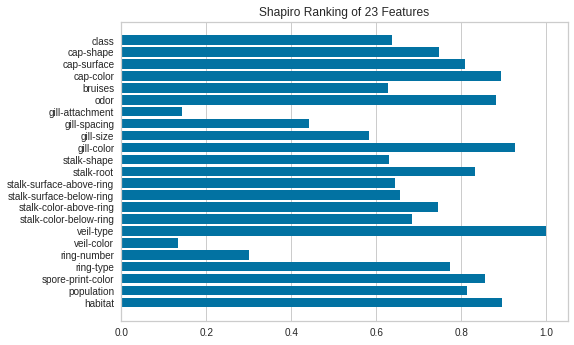

In [31]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

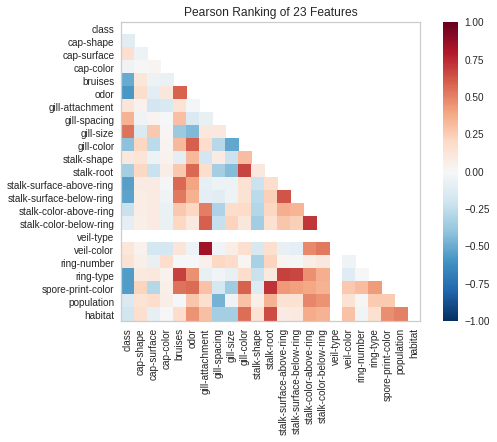

In [32]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

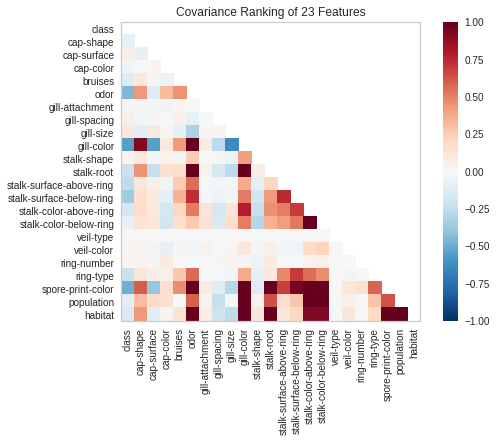

In [33]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

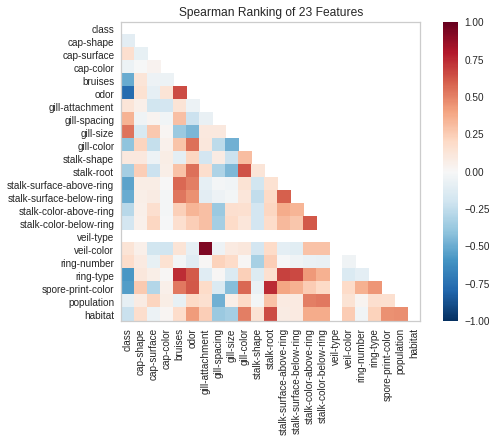

In [34]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

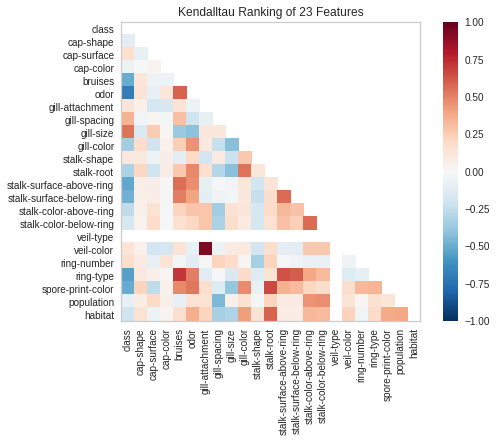

In [35]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

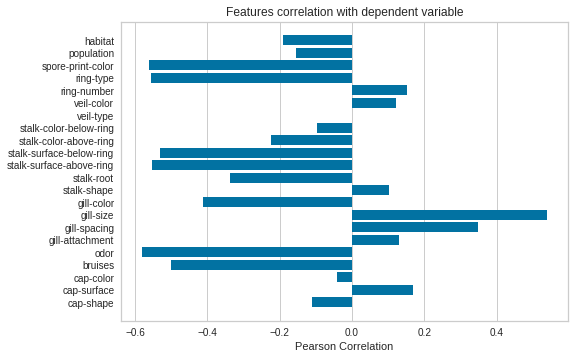

In [36]:
feature_correlation(X, y);

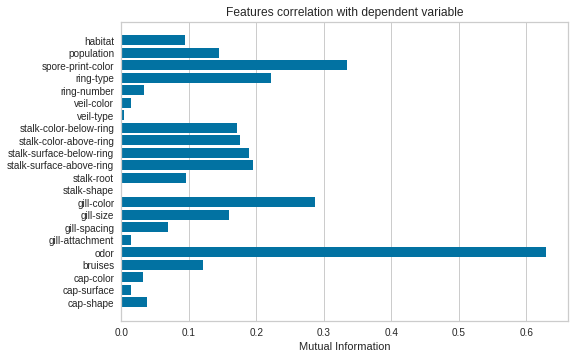

In [37]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to decision tree

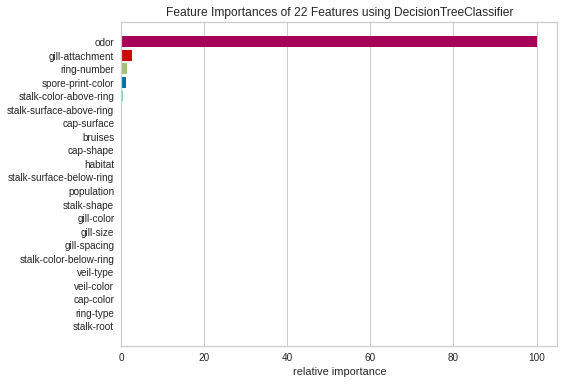

In [38]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

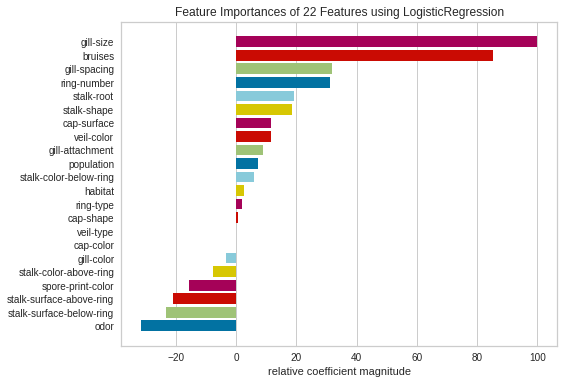

In [39]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

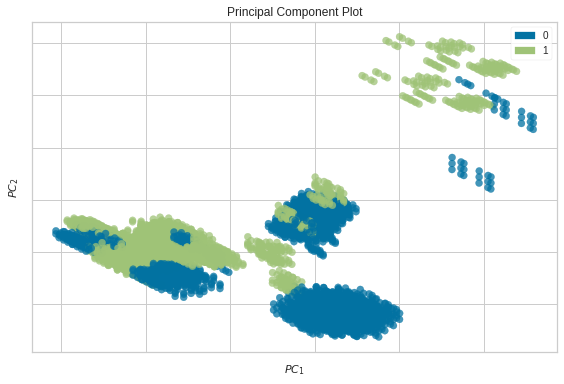

In [40]:
pca_decomposition(X, y.astype(int));

#### Class balancing

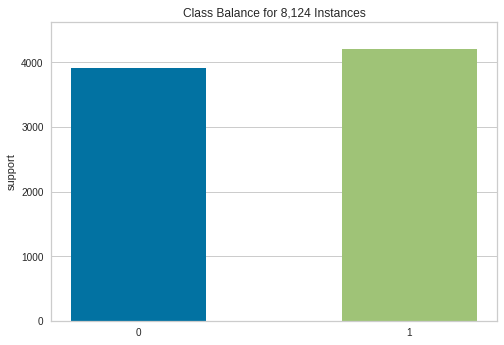

Entropy =  0.9990678968724604


In [41]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

## Splitting data in train and test sets 

In [42]:
y = pd.get_dummies(df[target_col])

In [43]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

## Modeling

### Building the model

Keras neural network definition

In [44]:
keras.backend.clear_session() 
#   neural network architecture: start 
model = Sequential() 
model.add(Dense(len(X.columns.tolist()) + len(df[target_col].unique()) + 2, 
          input_dim=len(X.columns.tolist()), activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(len(df[target_col].unique()), activation='softmax')) 
#   neural network architecture: end   
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Early Stopping

In [45]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

### Model fitting

In [46]:
%%time
history = model.fit(X_train, y_train, batch_size=64, epochs=2000, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/2000
86/86 [==============================] - 2s 9ms/step - loss: 0.6535 - accuracy: 0.6706 - val_loss: 0.3818 - val_accuracy: 0.8258
Epoch 2/2000
86/86 [==============================] - 0s 6ms/step - loss: 0.2635 - accuracy: 0.9159 - val_loss: 0.1979 - val_accuracy: 0.9370
Epoch 3/2000
86/86 [==============================] - 0s 5ms/step - loss: 0.1599 - accuracy: 0.9500 - val_loss: 0.1436 - val_accuracy: 0.9474
Epoch 4/2000
86/86 [==============================] - 0s 5ms/step - loss: 0.1093 - accuracy: 0.9646 - val_loss: 0.0955 - val_accuracy: 0.9683
Epoch 5/2000
86/86 [==============================] - 0s 5ms/step - loss: 0.0771 - accuracy: 0.9784 - val_loss: 0.0619 - val_accuracy: 0.9821
Epoch 6/2000
86/86 [==============================] - 0s 5ms/step - loss: 0.0542 - accuracy: 0.9882 - val_loss: 0.0408 - val_accuracy: 0.9929
Epoch 7/2000
86/86 [==============================] - 0s 5ms/step - loss: 0.0422 - accuracy: 0.9914 - val_loss: 0.0294 - val_accuracy: 0.9959
Epoch 

86/86 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.4223e-04 - val_accuracy: 1.0000
Epoch 58/2000
86/86 [==============================] - 0s 4ms/step - loss: 6.2298e-04 - accuracy: 1.0000 - val_loss: 3.0518e-04 - val_accuracy: 1.0000
Epoch 59/2000
86/86 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 5.3844e-04 - val_accuracy: 1.0000
Epoch 60/2000
86/86 [==============================] - 0s 4ms/step - loss: 6.9384e-04 - accuracy: 1.0000 - val_loss: 3.6546e-04 - val_accuracy: 1.0000
Epoch 61/2000
86/86 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.4335e-04 - val_accuracy: 1.0000
Epoch 62/2000
86/86 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.8497e-04 - val_accuracy: 1.0000
Epoch 63/2000
86/86 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.0653e-04 

#### Keras neural network description

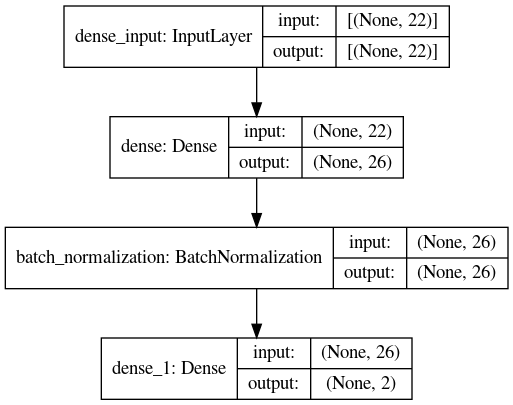

In [47]:
plot_model(model, show_shapes=True, show_layer_names=True)

### Model evaluation

#### Learning curve

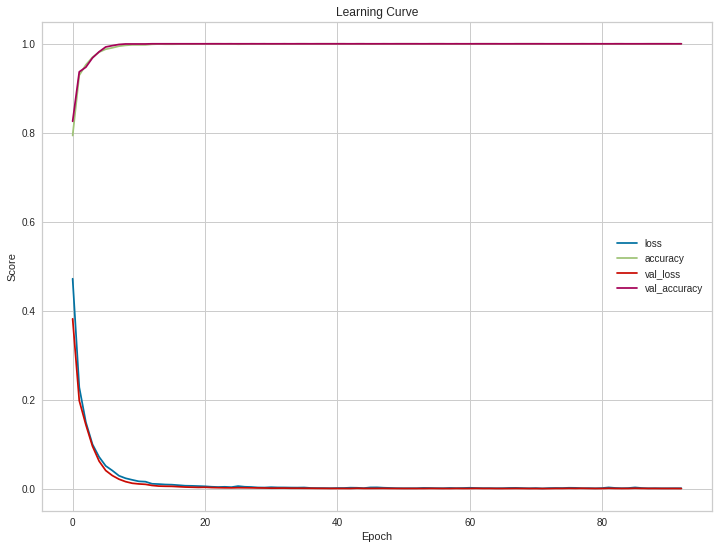

In [48]:
plot_history(history);